![Data Preprocessing in Python and R](https://pbs.twimg.com/media/FHP9pj5X0AER4m6?format=jpg&name=large)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### <font color = blue>Required  Libraries</font>
First, we import libraries that we required in our project. And we are using libraries like `microbenchmark`, `ggplot2`, `dplyr`, `data.table`, and `sqldf`.

In [2]:
# import Libraries
library("sqldf")
library('dplyr')
library("R.utils")
library("data.table")
library("ggplot2")
library("microbenchmark")

### <font color = blue>Given Dataset</font>
We are working on following dataset taken from https://travel.stackexchange.com/ which consists of the
following data frames:
* Badges.csv.gz
* Comments.csv.gz
* PostLinks.csv.gz
* Posts.csv.gz
* Tags.csv.gz
* Users.csv.gz
* Votes.csv.gz

In [3]:
# Loading dataset
options(stringsAsFactors=FALSE)
Tages <- read.csv("Dataset/Tags.csv.gz")
Posts <- read.csv("Dataset/Posts.csv.gz")
Users <- read.csv("Dataset/Users.csv.gz")
Votes <- read.csv("Dataset/Votes.csv.gz")
Badges <- read.csv("Dataset/Badges.csv.gz")
Comments <- read.csv("Dataset/Comments.csv.gz")
PostLinks <- read.csv("Dataset/PostLinks.csv.gz")

In [4]:
# Loading dataset for data.table library
VotesD <- as.data.table(Votes)
TagesD <- as.data.table(Tages)
PostsD <- as.data.table(Posts)
UsersD <- as.data.table(Users)
BadgesD <- as.data.table(Badges)
CommentsD <- as.data.table(Comments)
PostLinksD <- as.data.table(PostLinks)

###  <font color = blue>Given Tasks</font>
* <b>SQL Queries Implementations:</b>
   1. sqldf::sqldf() 
   2. base functions
   3. dplyr
   4. data.table

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

>> # <font color=red>Task 1</font>

![Task 1](https://pbs.twimg.com/media/FF1sGL3WUAE9xxg?format=png&name=small)

### <font color=blue>1.1 SQLDF</font>
Working with SQL DataFrame

In [18]:
Task1_sqldf <- function(){
    sqldf_sol1 = sqldf("SELECT 
                            Name, 
                            COUNT(*) AS Number, 
                            MIN(Class) AS BestClass 
                        FROM Badges 
                        GROUP BY Name 
                        ORDER BY Number DESC 
                        LIMIT 10")
    return(sqldf_sol1)
}

sqldf_sol1 <- Task1_sqldf()

### <font color=blue>1.2 Base Solution</font>
Working with R

In [19]:
Task1_R <- function() {
    
  Badges1 <- data.frame( aggregate(list(Badges$Name), by = list(Badges$Name), FUN = length))
    
  colnames(Badges1) <- c("Group","Number")
    
  Badges2 <- data.frame( aggregate(list(Badges$Class), by = list(Badges$Name), FUN = min))
    
  colnames(Badges2) <- c("Group","Class")

  Scratch_sol1 <- merge(Badges1, Badges2, by="Group")
    
  Scratch_sol1 <- Scratch_sol1[head(order(Scratch_sol1$Number, decreasing = TRUE), n = 10),]
        
  colnames(Scratch_sol1) <- c("Name", "Number", "BestClass")
    
  Scratch_sol1 <- head(Scratch_sol1, 10)
        
  return(Scratch_sol1)
}

Scratch_sol1 <- Task1_R()

### <font color=blue>1.3 Data.Table</font>
Working with Data.Table 

In [21]:
Task1_dt <- function() {
    
  dt_sol1 <- BadgesD[,list( Number = .N,  BestClass = max(Class)), by=Name]
        
  dt_sol1 <- setorderv(dt_sol1, cols=c("Number", "Name"), order=-1L)
         
  dt_sol1 <- head(dt_sol1, 10)
        
}

dt_sol1 <- Task1_dt()

### <font color=blue>1.4 Dplyr</font>
Working with Dplyr

In [22]:
Task1_dplyr <- function() {

  dplyr_sol1 <- Badges %>%  select(Name, Class) %>%  group_by(Name) %>%  summarise(Number = n(), 
               BestClass = max(Class), .groups = "drop") %>% arrange(across("Number", desc))
    
  ddplyr_sol1<- head(dplyr_sol1, 10)
}

dplyr_sol1 <- Task1_dplyr()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

>### <font color=green>Requirements For Task 1</font>

### <font color=blue>a) Sample Data</font>
Sample Data from Task 1

In [23]:
Sample_Data <- head(sqldf_sol1)

Sample_Data

Name,Number,BestClass
Autobiographer,24564,3
Student,23930,3
Supporter,17826,3
Popular Question,14840,3
Nice Answer,12406,3
Yearling,11281,2


### <font color=blue>b) Summary</font>
Summary of Task 1 Data

In [24]:
Summary <- str(sqldf_sol1)

Summary

'data.frame':	10 obs. of  3 variables:
 $ Name     : chr  "Autobiographer" "Student" "Supporter" "Popular Question" ...
 $ Number   : int  24564 23930 17826 14840 12406 11281 9746 9115 8613 7224
 $ BestClass: int  3 3 3 3 3 2 3 3 2 3


NULL

### <font color=blue>c) Comparison </font>
Comparing all four methods that we implement for Task 1 and taking SQLDF as base.

In [25]:
dplyr::all_equal(sqldf_sol1, Scratch_sol1)        # Base Solution

[1] TRUE

In [26]:
dplyr::all_equal(sqldf_sol1, dt_sol1)            # DataTable Solution

[1] TRUE

In [27]:
dplyr::all_equal(sqldf_sol1, dplyr_sol1)         # Dplyr Solution

[1] TRUE

### <font color=blue>d) Execution Time </font>
Execution Time of Four Mehtods that we Implemented in Task Task 1

In [54]:
Execution_Time1 <- microbenchmark(
  sqldf=Task1_sqldf(),
  base=Task1_R(),
  data.table=Task1_dt(),
  dplyr=Task1_dplyr(),
  times = 10L)

print(Execution_Time1)

Unit: milliseconds
       expr      min       lq      mean   median       uq      max neval
      sqldf 434.9293 446.8087 531.17671 516.8863 612.8974 692.0881    10
       base 282.4193 290.5703 364.43577 373.3746 409.8629 473.7640    10
 data.table  13.5650  14.9048  16.28118  15.2713  16.1628  26.2675    10
      dplyr  26.1661  27.2182  56.24080  30.5543  36.0461 278.1298    10


### <font color=blue>e) Plot for Microbenchmark  </font>
In this task we will plot execution time using autplot

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


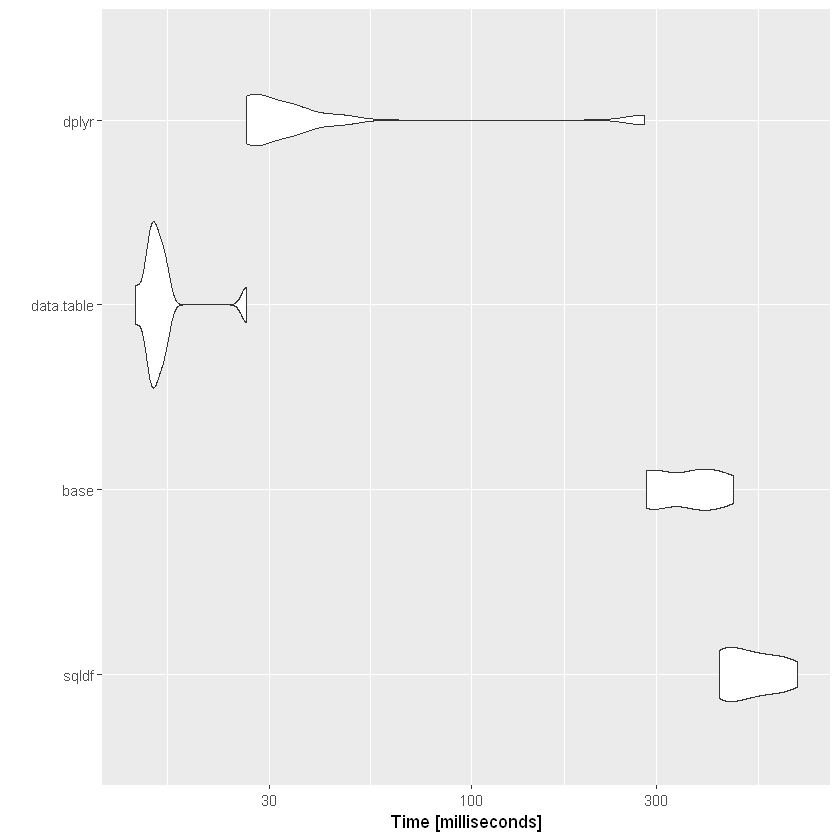

In [55]:
autoplot(Execution_Time1)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

>> # <font color=red>Task 2 </font>

![Task 2](https://pbs.twimg.com/media/FF1sGL3XsAIUmJD?format=png&name=900x900)

### <font color=blue>2.1 SQLDF</font>
Working with SQL DataFrame

In [56]:
Task2_sqldf <- function(){
    sqldf_sol2 = sqldf("SELECT Location, COUNT(*) AS Count
                        FROM (
                            SELECT Posts.OwnerUserId, Users.Id, Users.Location
                            FROM Users
                            JOIN Posts ON Users.Id = Posts.OwnerUserId
                        )
                        WHERE Location NOT IN ('')
                        GROUP BY Location

                        ORDER BY Count DESC
                        LIMIT 10")
    return(sqldf_sol2)
}

sqldf_sol2<-Task2_sqldf()

### <font color=blue>2.2 Base Solution</font>
Working with R

In [57]:
Task2_R <- function() {
    
  posts_users <- merge(x = Users, y = Posts, by.x = "Id", by.y = "OwnerUserId")
    
  posts_users <- posts_users[posts_users$Location != "",]
    
  posts_users <- aggregate(x = posts_users, by=list(posts_users$Location), FUN = length)
  as.data.frame(posts_users)
    
  Scratch_sol2 <- posts_users[, c("Group.1", "Location")]
    
  colnames(Scratch_sol2) <- c("Location", "Count")
    
  Scratch_sol2 <- Scratch_sol2[order(Scratch_sol2$Count, decreasing=TRUE),]
  
  Scratch_sol2 <- head(Scratch_sol2, 10)
    
  return(Scratch_sol2)
}

Scratch_sol2 <- Task2_R()

### <font color=blue>2.3 Data.Table</font>
Working with Data.Table

In [59]:
Task2_dt <- function() {
      
  setkey(PostsD, OwnerUserId)
  setkey(UsersD, Id)
    
  dt_sol2 <- UsersD[PostsD, nomatch=0]
        
  dt_sol2 <- dt_sol2[, list("Count" = .N), by = .(Location)]
    
  dt_sol2 <- dt_sol2[Location != ""]
    
  dt_sol2 <- dt_sol2[order(-Count)]
    
  dt_sol2 <- head(dt_sol2, 10)
    
  return(dt_sol2)
}

dt_sol2 <- Task2_dt()

### <font color=blue>2.4 Dplyr</font>
Working with Dplyr

In [60]:
Task2_dplyr <- function() { 

  dplyr_sol2 <- inner_join(Posts, Users, by = c("OwnerUserId"="Id")) %>% select(OwnerUserId, Id, Location) %>%
                group_by(Location) %>% filter(Location != "") %>% summarise(Count = n(), .groups = "drop") %>%
                arrange(across("Count", desc))
    
  dplyr_sol2 <- head(dplyr_sol2, 10)
    
  return(dplyr_sol2)
}

dplyr_sol2 <- Task2_dplyr()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

>### <font color=green>Requirements For Task 2</font>

### <font color=blue>a) Sample Data</font>
Sample Data from Task 2

In [61]:
Sample_Data <- head(sqldf_sol2)

Sample_Data

Location,Count
"Christchurch, New Zealand",2765
"New York, NY",1788
"London, United Kingdom",1708
UK,1590
"Sunshine Coast QLD, Australia",1550
Australia,1183


### <font color=blue>b) Summary</font>
Summary of Task 2 Data

In [62]:
Summary <- str(sqldf_sol2)

print(Summary)

'data.frame':	10 obs. of  2 variables:
 $ Location: chr  "Christchurch, New Zealand" "New York, NY" "London, United Kingdom" "UK" ...
 $ Count   : int  2765 1788 1708 1590 1550 1183 967 935 924 921
NULL


### <font color=blue>c) Comparison </font>
Comparing all four methods that we implement in Task 2 and taking SQLDF as base.

In [63]:
dplyr::all_equal(sqldf_sol2, Scratch_sol2)        # Base Solution

[1] TRUE

In [64]:
dplyr::all_equal(sqldf_sol2, dt_sol2)            # DataTable Solution

[1] TRUE

In [65]:
dplyr::all_equal(sqldf_sol2, dplyr_sol2)         # Dplyr Solution

[1] TRUE

### <font color=blue>d) Execution Time</font>
Execution Time of Four Mehtods that we Implemented in Task 2

In [68]:
Execution_Time2 <- microbenchmark(
  sqldf=Task2_sqldf(),
  base=Task2_R(),
  data.table=Task2_dt(),
  dplyr=Task2_dplyr(),
  times = 10L)

print(Execution_Time2)

Unit: milliseconds
       expr       min        lq       mean     median        uq       max neval
      sqldf 3238.9428 3336.3828 3635.99292 3479.00305 4026.4990 4287.8985    10
       base 1459.5215 1622.7073 1799.41655 1691.34375 1975.0371 2490.7991    10
 data.table   77.1915   77.8397   93.70883   79.52335  101.9711  178.9383    10
      dplyr  169.5229  195.1658  249.27186  277.80915  301.4269  317.1546    10


### <font color=blue>e) Plot for Microbenchmark  </font>
In this task we will plot execution time using autplot

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


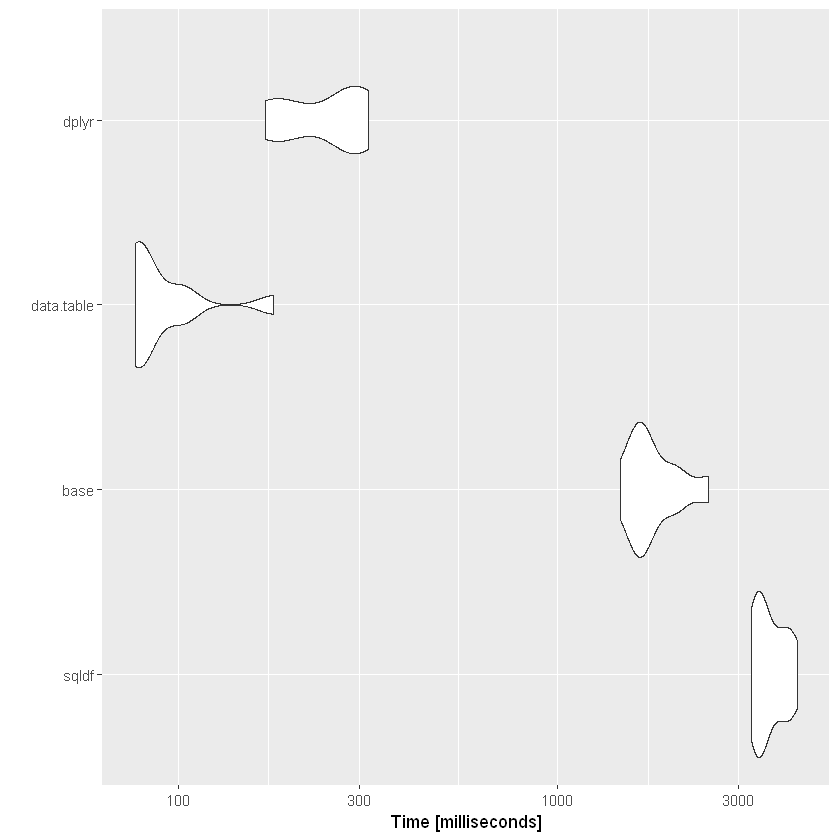

In [69]:
autoplot(Execution_Time2)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

>> # <font color=red>Task 3 </font>

![Task 3](https://pbs.twimg.com/media/FF1sGNkXIAQfgPq?format=jpg&name=medium)

### <font color=blue>3.1 SQLDF</font>
Working with SQL DataFrame

In [73]:
Task3_sqldf <- function(){
    sqldf_sol3 = sqldf("SELECT
                            Users.AccountId,
                            Users.DisplayName,
                            Users.Location,
                            AVG(PostAuth.AnswersCount) as AverageAnswersCount
                        FROM
                        (
                            SELECT
                                AnsCount.AnswersCount,
                                Posts.Id,
                                Posts.OwnerUserId
                            FROM (
                                    SELECT Posts.ParentId, COUNT(*) AS AnswersCount
                                    FROM Posts
                                    WHERE Posts.PostTypeId = 2
                                    GROUP BY Posts.ParentId
                                ) AS AnsCount
                            JOIN Posts ON Posts.Id = AnsCount.ParentId
                        ) AS PostAuth
                        JOIN Users ON Users.AccountId=PostAuth.OwnerUserId
                        GROUP BY OwnerUserId
                        ORDER BY AverageAnswersCount DESC
                        LIMIT 10")
    return(sqldf_sol3)
}

sqldf_sol3 <- Task3_sqldf()

### <font color=blue>3.2 Base Solution</font>
Working with R

In [76]:
Task3_R <- function () { 
    
  AnsCount <- Posts[c("ParentId", "PostTypeId")]
    
  AnsCount <- AnsCount[AnsCount$PostTypeId == 2,]
    
  AnsCount <- AnsCount["ParentId"]
    
  AnsCount <- aggregate(AnsCount, by = list(AnsCount$ParentId), FUN = length)
    
  colnames(AnsCount) <- c("ParentId", "AnswersCount")

  Post <- Posts[c("Id", "OwnerUserId")]
    
  PostAuth <- merge(Post, AnsCount, by.x = "Id", by.y = "ParentId")

  user <- Users[c("AccountId")]

  Scratch_sol3 <- merge(user , PostAuth, by.x = "AccountId", by.y = "OwnerUserId",)

  rm.na.mean <- function(x) mean(x, rm.na = True)
    
  Scratch_sol3 <- aggregate(Scratch_sol3, by = list(Scratch_sol3$AccountId), FUN = rm.na.mean)
    
  drops <- c("AccountId", "Id")
    
  Scratch_sol3 <- Scratch_sol3[, !(names(Scratch_sol3) %in% drops)]

  colnames(Scratch_sol3) <- c("AccountId", "AverageAnswersCount")

  user  <- unique(Users[c("AccountId", "DisplayName", "Location")])
    
  Scratch_sol3 <- merge(Scratch_sol3, user)
  
  Scratch_sol3 <- Scratch_sol3[order(-Scratch_sol3$AverageAnswersCount),]

  Scratch_sol3 <- head(Scratch_sol3, 10)
    
return(Scratch_sol3)
}

Scratch_sol3 <- Task3_R()

### <font color=blue>3.3 Data.Table</font>
Working with Data.Table

In [79]:
Task3_dt <- function() {
    
  AnsCountDT <- PostsD[PostTypeId == 2, list("AnswersCount" = .N) , by = .(ParentId)]
    
  PostsDT <- PostsD[,list("Id" = Id, "OwnerUserId" = OwnerUserId),]
        
  setkey(AnsCountDT, ParentId)
  setkey(PostsDT, Id)
    
  PostAuthDT <- AnsCountDT[PostsDT, nomatch=0]
        
  UsersDT <- data.table(Users)
    
  setkey(PostAuthDT, OwnerUserId)
    
  setkey(UsersDT, AccountId)
    
  dt_sol3  <- UsersDT[PostAuthDT, nomatch=0]
        
  dt_sol3  <- dt_sol3 [,list("DisplayName" = DisplayName, "Location" = Location, 
                   "AverageAnswersCount" = mean(AnswersCount)), by = "AccountId"]
    
  dt_sol3  <- setorderv(dt_sol3 , cols=c("AverageAnswersCount","AccountId"), order=-1L)[1:10,]
    
  dt_sol3  <- dt_sol3[order(-AverageAnswersCount)]
    
  dt_sol3  <- head(dt_sol3, 10)
    
return(dt_sol3)
    
        
}

dt_sol3 <- Task3_dt()

### <font color=blue>3.4 Dplyr</font>
Working with Dplyr

In [99]:
Task3_dplyr <- function() {

  AnsCount <- Posts %>%  select(ParentId, PostTypeId) %>%   filter(PostTypeId == 2) %>%  group_by(ParentId) %>%
                         summarise(AnswersCount = n(), ParentId = unique(ParentId))
                
  PostAuth <- inner_join(Posts, AnsCount, by=c("Id"="ParentId")) %>% select(AnswersCount, ParentId, OwnerUserId)
                
  dplyr_sol3 <- inner_join(Users, PostAuth, by = c("AccountId"="OwnerUserId")) %>% 
              select(AccountId, DisplayName, Location, AnswersCount) %>% group_by(AccountId) %>%
               summarise(DisplayName, Location, "AverageAnswersCount" = mean(AnswersCount),.groups = "drop_last") %>%
              arrange(across(c("AverageAnswersCount","AccountId"), desc)) %>% slice_head(n = 10)

  return(dplyr_sol3)
}

dplyr_sol3 <- Task3_dplyr()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

>### <font color=green>Requirements For Task 3</font>

### <font color=blue>a) Sample Data</font>
Sample Data from Task 3

In [92]:
Sample_Data <- head(sqldf_sol3)

Sample_Data

AccountId,DisplayName,Location,AverageAnswersCount
40811,vocaro,"San Jose, CA",11
280,csmba,"San Francisco, CA",11
44093,Emma Arbogast,"Salem, OR",10
204,Josh,Australia,10
11758,rvarcher,"Oklahoma City, OK",9
79346,Thomas Matthews,California,8


### <font color=blue>b) Summary</font>
Summary of Task 3 Data

In [100]:
Summary <- str(sqldf_sol3)

print(Summary)

'data.frame':	10 obs. of  4 variables:
 $ AccountId          : int  40811 280 44093 204 11758 79346 54571 42364 20473 19588
 $ DisplayName        : chr  "vocaro" "csmba" "Emma Arbogast" "Josh" ...
 $ Location           : chr  "San Jose, CA" "San Francisco, CA" "Salem, OR" "Australia" ...
 $ AverageAnswersCount: num  11 11 10 10 9 8 8 8 8 8
NULL


### <font color=blue>c) Comparison </font>
Comparing all four method that we implement in Task 3 and taking SQLDF as base.

In [101]:
dplyr::all_equal(sqldf_sol3, Scratch_sol3)        # Base Solution

[1] TRUE

In [102]:
dplyr::all_equal(sqldf_sol3, dt_sol3)            # DataTable Solution

[1] TRUE

In [103]:
dplyr::all_equal(sqldf_sol3, dplyr_sol3)         # Dplyr Solution

[1] TRUE

### <font color=blue>d) Execution Time</font>
Execution Time of Four Mehtod that we Implemented in Task 3

In [108]:
Execution_Time3 <- microbenchmark(
  sqldf=Task3_sqldf(),
  base=Task3_R(),
  data.table=Task3_dt(),
  dplyr=Task3_dplyr(),
  times = 10L)

print(Execution_Time3)

Unit: milliseconds
       expr       min        lq       mean    median        uq       max neval
      sqldf 3230.9896 3521.5016 3715.96776 3579.5226 3869.7029 4648.0653    10
       base 1205.9517 1324.7816 1501.01896 1465.6244 1607.3859 1883.7612    10
 data.table   63.7844   65.9051   71.62652   67.0664   76.2671   92.2515    10
      dplyr 1770.1438 1841.8816 2209.14044 2136.7649 2642.7045 2838.0249    10


### <font color=blue>e) Plot for Microbenchmark  </font>
In this task we will plot execution time using autplot

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


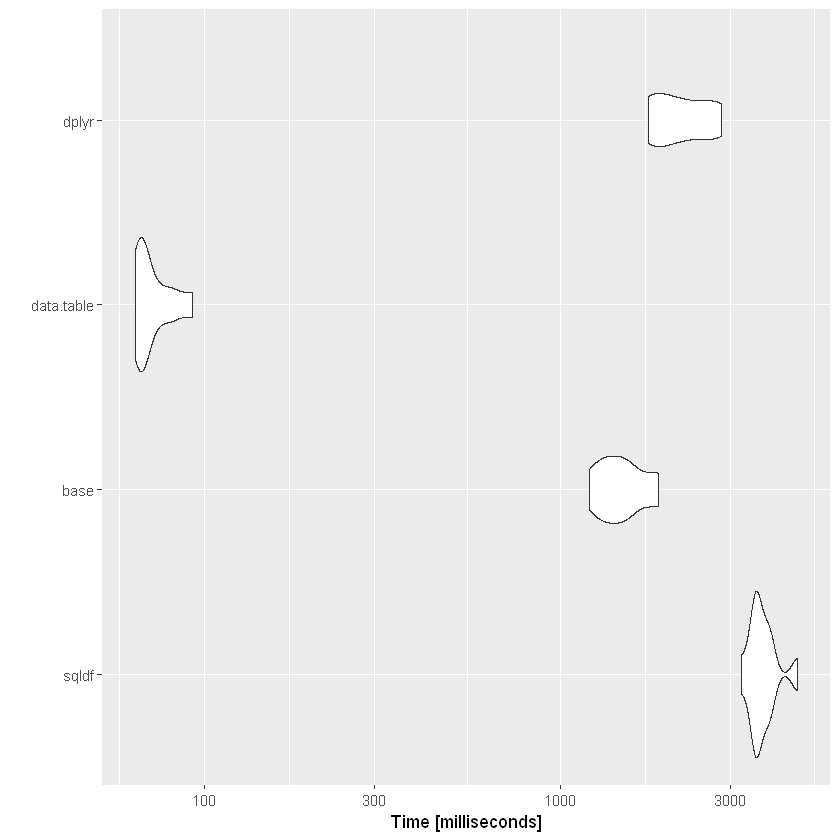

In [109]:
autoplot(Execution_Time3)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

>> # <font color=red>Task 4 </font>

![Task 4](https://pbs.twimg.com/media/FF1sGOdXwAA0t8y?format=jpg&name=medium)

### <font color=blue>4.1 SQLDF</font>
Working with SQL DataFrame

In [7]:
Task4_sqldf <- function(){
    sqldf_sol4 = sqldf("SELECT
                            Posts.Title,
                            UpVotesPerYear.Year,
                            MAX(UpVotesPerYear.Count) AS Count
                        FROM (
                                SELECT
                                    PostId,
                                    COUNT(*) AS Count,
                                    STRFTIME('%Y', Votes.CreationDate) AS Year
                                FROM Votes
                                WHERE VoteTypeId=2
                                GROUP BY PostId, Year
                            ) AS UpVotesPerYear
                        JOIN Posts ON Posts.Id=UpVotesPerYear.PostId
                        WHERE Posts.PostTypeId=1
                        GROUP BY Year
                        ORDER BY Year ASC"
                        )
    return(sqldf_sol4)
}

sqldf_sol4 <- Task4_sqldf()

### <font color=blue>4.2 Base Solution</font>
Working with R

In [8]:
Task4_R <- function() {

  votes_ <- data.frame(PostId = Votes$PostId, CreationDate = Votes$CreationDate, VoteTypeId = Votes$VoteTypeId)
  votes_ <- votes_[votes_$VoteTypeId == 2,]
  votes_$CreationDate <- strftime(votes_$CreationDate, "%Y")
        
  votes_ <- aggregate(votes_, by = list(votes_$CreationDate, votes_$PostId), FUN = length)[,1:3]
  colnames(votes_) <- c("Year","PostId", "Count")
        
  posts_ <- data.frame(Id = Posts$Id, Title = Posts$Title, PostTypeId = Posts$PostTypeId)
  posts_ <- posts_[posts_$PostTypeId == 1,]

  Scratch_sol4 <- merge(votes_, posts_, by.x="PostId", by.y = "Id")[,c(2:4)]
  Scratch_sol4 <- do.call(rbind, lapply( split(Scratch_sol4, Scratch_sol4[, "Year"]), 
                                        function(x) { x[which.max(x[, "Count"]),]} ))
  return(Scratch_sol4)
}

Scratch_sol4 <- Task4_R()

### <font color=blue>4.3 Data.Table</font>
Working with Data.Table

In [9]:
Task4_dt <- function() {
    
  VotesDT <- VotesD[VoteTypeId == 2]
    
  VotesDT <- VotesDT[,Year := strftime(CreationDate, "%Y")]
    
  VotesDT <- VotesDT[,.(PostId, Year, Count = .N), by=.(PostId, Year)]
    
  VotesDT <- setorderv(VotesDT, cols=c("PostId", "Year"))
    
  PostsDT <- PostsD[PostTypeId == 1]
    
  setkey(VotesDT, PostId)
  setkey(PostsDT, Id)
    
  dt_sol4 <- PostsDT[VotesDT, nomatch=0]
  dt_sol4 <- dt_sol4[,.SD[which.max(Count)], by = Year]
  dt_sol4 <- dt_sol4[,.(Year, Title, Count),]
  dt_sol4 <- setorderv(dt_sol4, cols=c("Year"))
    
  return(dt_sol4)
}

dt_sol4 <- Task4_dt()

### <font color=blue>4.4 Dplyr</font>
Working with Dplyr

In [10]:
Task4_dplyr <- function() {
  vote <- Votes %>%  filter(VoteTypeId == 2) %>% select(PostId, CreationDate) %>% 
          mutate(Year = strftime(CreationDate, "%Y")) %>% group_by(PostId, Year) %>% 
          summarise(PostId = unique(PostId), Count = n(), Year = unique(Year), .groups = 'drop')
                
  dplyr_sol4 <- Posts %>%  filter(PostTypeId == 1) %>% inner_join(vote, by = c("Id"="PostId")) %>%
            select(Title, Year, Count) %>% group_by(Year) %>% filter(Count == max(Count)) %>% arrange(across("Year"))
    
  return(dplyr_sol4)
}

dplyr_sol4 <- Task4_dplyr()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

>### <font color=green>Requirements For Task 4</font>

### <font color=blue>a) Sample Data</font>
Sample Data from Task 4

In [11]:
Sample_Data <- head(sqldf_sol4)

Sample_Data

Title,Year,Count
"OK we're all adults here, so really, how on earth should I use a squat toilet?",2011,70
How to successfully haggle / bargain in markets,2012,37
Why are airline passengers asked to lift up window shades during takeoff and landing?,2013,103
How do you know if Americans genuinely/literally mean what they say?,2014,179
Immigration officer that stopped me at the airport is texting me. What do I do?,2015,117
I don't know my nationality. How can I visit Denmark?,2016,134


### <font color=blue>b) Summary</font>
Summary of Task 4 Data

In [12]:
Summary <- str(sqldf_sol4)

print(Summary)

'data.frame':	11 obs. of  3 variables:
 $ Title: chr  "OK we're all adults here, so really, how on earth should I use a squat toilet?" "How to successfully haggle / bargain in markets" "Why are airline passengers asked to lift up window shades during takeoff and landing?" "How do you know if Americans genuinely/literally mean what they say?" ...
 $ Year : chr  "2011" "2012" "2013" "2014" ...
 $ Count: int  70 37 103 179 117 134 177 119 263 110 ...
NULL


### <font color=blue>c) Comparison </font>
Comparing all four methods that we implement and taking SQLDF as base.

In [13]:
dplyr::all_equal(sqldf_sol4, Scratch_sol4)         # Base Solution

[1] TRUE

In [14]:
dplyr::all_equal(sqldf_sol4, dt_sol4)             # DataTable Solution

[1] TRUE

In [15]:
dplyr::all_equal(sqldf_sol4, dplyr_sol4)          # Dplyr Solution 

[1] TRUE

### <font color=blue>d) Execution Time</font>
Execution Time of Four Mehtods that we Implemented in Task 4

In [16]:
Execution_Time4 <- microbenchmark(
  sqldf=Task4_sqldf(),
  base=Task4_R(),
  data.table=Task4_dt(),
  dplyr=Task4_dplyr(),
  times = 10L)

print(Execution_Time4)

Unit: seconds
       expr       min        lq      mean   median       uq       max neval
      sqldf  5.660555  5.946915  6.748745  6.28036  7.18853  9.995631    10
       base 42.440428 42.806739 44.918377 43.43585 45.47048 54.840864    10
 data.table 28.581998 29.498020 31.853540 30.98307 33.43741 38.816942    10
      dplyr 39.964951 40.608917 44.342061 44.34239 47.16320 51.078826    10


### <font color=blue>e) Plot for Microbenchmark  </font>
In this task we will plot execution time using autplot

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


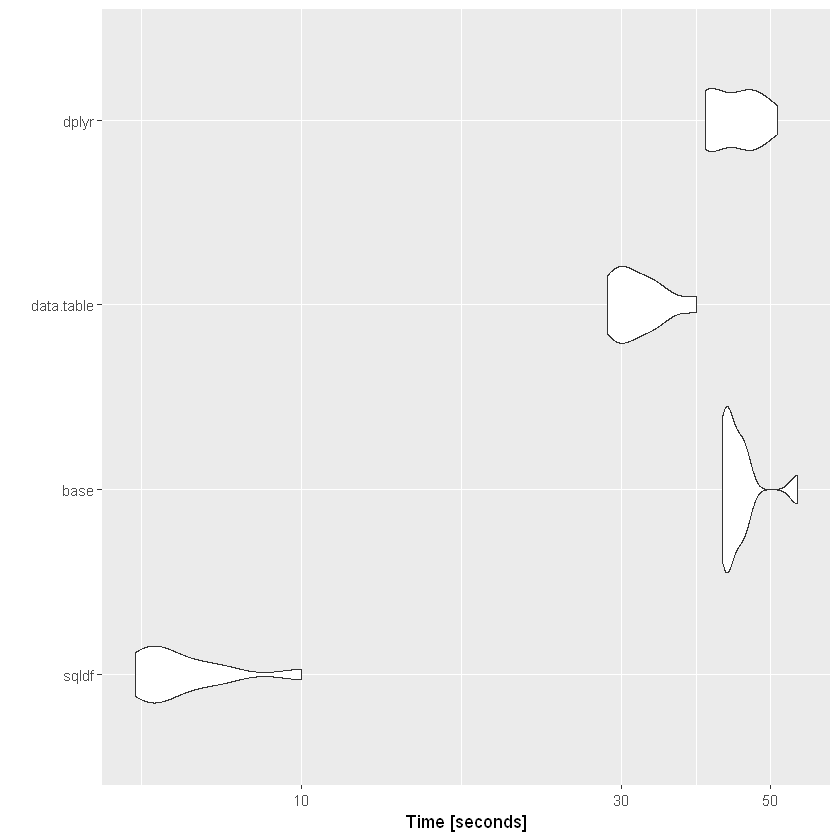

In [17]:
autoplot(Execution_Time4)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

>> # <font color=red> Task 5 </font>

![Task 5](https://pbs.twimg.com/media/FF1snDkXwAMFl3_?format=jpg&name=medium)

### <font color=blue>5.1 SQLDF</font>
Working with SQL Data Frame

In [18]:
Task5_sqldf <- function(){

    sqldf_sol5 <- sqldf("SELECT
                            Posts.Title,
                            VotesByAge2.OldVotes
                        FROM Posts
                        JOIN (
                            SELECT
                            PostId,
                            MAX(CASE WHEN VoteDate = 'new' THEN Total ELSE 0 END) NewVotes,
                            MAX(CASE WHEN VoteDate = 'old' THEN Total ELSE 0 END) OldVotes,
                            SUM(Total) AS Votes
                        FROM (
                            SELECT
                                PostId,
                            CASE STRFTIME('%Y', CreationDate)
                                WHEN '2021' THEN 'new'
                                WHEN '2020' THEN 'new'
                                ELSE 'old'
                                END VoteDate,
                            COUNT(*) AS Total
                        FROM Votes
                    WHERE VoteTypeId IN (1, 2, 5)
                    GROUP BY PostId, VoteDate
                ) AS VotesByAge
                GROUP BY VotesByAge.PostId
                HAVING NewVotes=0
                ) AS VotesByAge2 ON VotesByAge2.PostId=Posts.ID
                WHERE Posts.PostTypeId=1
                ORDER BY VotesByAge2.OldVotes DESC
                LIMIT 10")

                return(sqldf_sol5 )
                
                }

sqldf_sol5 <- Task5_sqldf()

### <font color=blue>5.2 Base Solution</font>
Working with R

In [19]:
Task5_R <- function (){
 
  Votes_By_Age <- Votes[Votes$VoteTypeId %in% c(1, 2, 5), c("PostId", "CreationDate")]

  Votes_By_Age$VoteDate <- substr(Votes_By_Age$CreationDate, 1, 4)
  Votes_By_Age$VoteDate <- ifelse(Votes_By_Age$VoteDate == '2021', 'new', 
                                  ifelse(Votes_By_Age$VoteDate == '2020', 'new', 'old'))
  
  drops <- c("CreationDate")
  Votes_By_Age <- Votes_By_Age[, !(names(Votes_By_Age) %in% drops)]

  Votes_By_Age <- aggregate(Votes_By_Age, by = list(Votes_By_Age$PostId, Votes_By_Age$VoteDate), FUN = length)

  drops <- c("VoteDate")
  Votes_By_Age <- Votes_By_Age[, !(names(Votes_By_Age) %in% drops)]
    
  colnames(Votes_By_Age) <- c("PostId", "VoteDate", "Total")

  Votes_By_Age$NewVotes <- ifelse(Votes_By_Age$VoteDate == 'new', Votes_By_Age$Total, 0)

  Votes_By_Age$OldVotes <- ifelse(Votes_By_Age$VoteDate == 'old', Votes_By_Age$Total, 0)

  drops <- c("VoteDate")
  Votes_By_Age <- Votes_By_Age[, !(names(Votes_By_Age) %in% drops)]

  Votes_By_Age <- aggregate(. ~ PostId, data = Votes_By_Age, FUN = function(x) c(max = max(x), sum = sum(x)))
                            
  Votes_By_Age <- do.call(data.frame, Votes_By_Age)

  Votes_By_Age <- Votes_By_Age[, c("PostId", "Total.sum", "NewVotes.max", "OldVotes.max")]
  colnames(Votes_By_Age) <- c("PostId", "Votes", "NewVotes", "OldVotes")
  Votes_By_Age <- Votes_By_Age[Votes_By_Age$NewVotes == 0,]

  Posts <- Posts[Posts$PostTypeId == 1, c("Title", "Id")]
                            
  Scratch_sol5 <- merge(Votes_By_Age, Posts, by.x = "PostId", by.y = "Id")
  Scratch_sol5 <- Scratch_sol5[, c("Title", "OldVotes")]
  Scratch_sol5 <- Scratch_sol5[order(-Scratch_sol5$OldVotes),]
  Scratch_sol5 <- head(Scratch_sol5, 10)
  Scratch_sol5$OldVotes <- as.integer(Scratch_sol5$OldVotes)
                            
  return(Scratch_sol5)
  }
                            
Scratch_sol5 <- Task5_R()

### <font color=blue>5.3 Data.Table</font>
Working with Data.Table

In [20]:
Task5_dt <- function(){

  dt_sol5 <- VotesD[VoteTypeId %in% c(1, 2, 5),]

  dt_sol5 <- dt_sol5[, Year := format(as.Date(strftime(CreationDate)), "%Y")]

  dt_sol5 <- dt_sol5[, VoteDate := ifelse(Year %in% c("2021", "2020"), "new", "old")]

  dt_sol5 <- dt_sol5[, list(Total = .N), by= c("VoteDate", "PostId")]

  dt_sol5[,c("NewVotes", "OldVotes")] <- dt_sol5[, list(NewVotes = ifelse(VoteDate == "new", Total, 0), 
                                                            OldVotes = ifelse(VoteDate == 'old', Total, 0))]

  dt_sol5 <- dt_sol5[, list(Votes = sum(Total), OldVotes = max(OldVotes), NewVotes = max(NewVotes)), by=PostId]
  
  dt_sol5 <- dt_sol5[NewVotes == 0,]

  setkey(dt_sol5, "PostId")
    
  setkey(PostsD, "Id")
  
  dt_sol5 <- dt_sol5[PostsD, nomatch = 0]

  dt_sol5 <- dt_sol5[PostTypeId == 1, c("Title", "OldVotes")]

  dt_sol5 <- dt_sol5[order(OldVotes, decreasing = TRUE)]
    
  dt_sol5 <- head(dt_sol5, 10)
  
  return(dt_sol5)
  }
        
dt_sol5 <- Task5_dt()

### <font color=blue>5.4 Dplyr</font>
Working with Dplyr 

In [24]:
Task5_dplyr <- function(){

  Votes$Year <- format(as.Date(strftime(Votes$CreationDate)), "%Y")
  Votes <- Votes[(Votes$VoteTypeId %in% c(1, 2, 5)),]

  Votes$VoteDate <- ifelse(Votes$Year %in% c("2021", "2020"), "new", "old")

  VotesByAge <- Votes %>% group_by(VoteDate, PostId, .groups = 'drop') %>% summarise(Total = n(), .groups = 'drop')

  dplyr_sol5 <- VotesByAge %>% mutate(NewVotes = ifelse(VoteDate == "new", Total, 0),
                              OldVotes = ifelse(VoteDate == "old", Total, 0))

  dplyr_sol5 <- dplyr_sol5 %>% group_by(PostId) %>% summarise(Votes = sum(Total), OldVotes = max(OldVotes),
                                                        NewVotes = max(NewVotes) ) %>% filter(NewVotes == 0)

  dplyr_sol5 <- inner_join(dplyr_sol5, Posts, by=c("PostId" = "Id")) %>% filter(PostTypeId == 1)


  dplyr_sol5 <- dplyr_sol5 %>% select(c("Title", "OldVotes")) %>% arrange(desc(OldVotes))
    
  dplyr_sol5 <- head(dplyr_sol5, 10)

  return(dplyr_sol5)
  }

dplyr_sol5 <- Task5_dplyr()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

>### <font color=green> Requirements For Task 5 </font>

### <font color=blue>a) Sample Data</font>
Sample Data from Task 5

In [25]:
Sample_Data <- head(sqldf_sol5)

Sample_Data

Title,OldVotes
How to avoid drinking vodka?,200
"How can I do a ""broad"" search for flights?",175
How to convince airport security that I am not dangerous when having metallic parts in my body?,119
Can I accidentally miss the in-flight food?,114
How can black travellers deal with unwanted harassment from locals in China?,108
Why are there no seat belts on trains?,106


### <font color=blue>b) Summary</font>
Summary of Task 5 Data

In [26]:
Summary <- str(sqldf_sol5)

Summary

'data.frame':	10 obs. of  2 variables:
 $ Title   : chr  "How to avoid drinking vodka?" "How can I do a \"broad\" search for flights?" "How to convince airport security that I am not dangerous when having metallic parts in my body?" "Can I accidentally miss the in-flight food?" ...
 $ OldVotes: int  200 175 119 114 108 106 104 102 99 97


NULL

### <font color=blue>c) Comparison </font>
Comparing all four method that we implement in Task 5 and taking SQLDF as base.

In [27]:
dplyr::all_equal(sqldf_sol5, as.data.frame(Scratch_sol5))                 # Base Solution

[1] TRUE

In [28]:
all.equal(sqldf_sol5, as.data.frame(dplyr_sol5))                          # Dplyr Solution 

[1] TRUE

In [29]:
all.equal(sqldf_sol5, as.data.frame(dt_sol5))                             # DataTable Solution

[1] TRUE

### <font color=blue>d) Execution Time</font>
Execution Time of Four Mehtod that we Implemented in Task 5

In [30]:
Execution_Time5 <- microbenchmark(
  sqldf=Task5_sqldf(),
  base=Task5_R(),
  data.table=Task5_dt(),
  dplyr=Task5_dplyr(),
  times = 10L)

print(Execution_Time5)

Unit: seconds
       expr       min        lq      mean    median        uq      max neval
      sqldf  6.506179  6.605041  6.957871  6.656929  7.477093  7.74693    10
       base 11.327331 11.592011 13.149539 12.872863 14.830266 15.38546    10
 data.table 49.417481 51.134175 51.971837 51.995945 52.851220 54.31883    10
      dplyr 62.764171 65.270138 65.545653 65.602179 65.921281 67.77679    10


### <font color=blue>e) Plot for Microbenchmark  </font>
In this task we will plot execution time using autplot

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


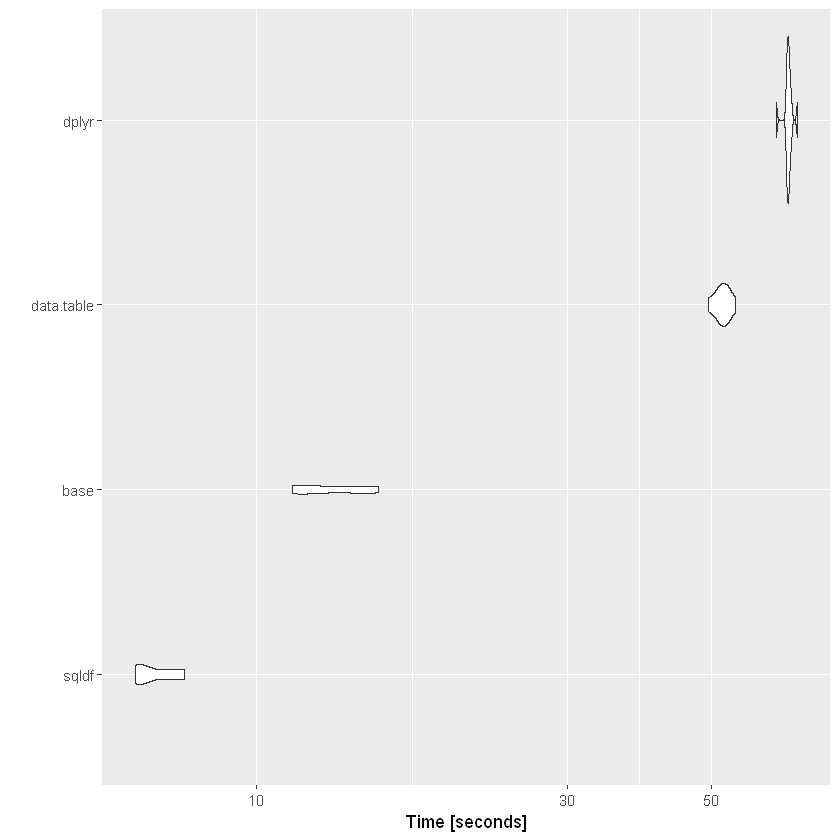

In [31]:
autoplot(Execution_Time5)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

##  <font color=#08B7F8>Conclusion  </font>

We discovered four alternative ways of data manipulation while working on this project, all of them are very different from one another. However, I believe that dplyr has an advantage over all of them due to the availability of more functions and simple language to manipulate. But if we compare the execution time of each method then Data.Table take lead from others.

<b>Remarks:</b> Thank you `Dr.Anna Cena` for such kind of Project on SQL queries Implementation. It was Logical and in some cases, it was complicated Especially in Task 4 and Task 5. I really enjoyed it to finish it. It gave me the chance to boost my Knowledge in R Langauge, Revise the Concept of SQL queries, working on different datasets and help me to get the knwoledge in Data.Table and Dplyr Packages as well:)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)